In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path = 'gdrive/My Drive/DL Project/data_in_csv'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as stl
stl.use('seaborn')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split

import os

In [0]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  
  #Loss Plotter
  fig, axs = plt.subplots(2)
  fig.suptitle(title)
  axs[0].plot(epochs, loss, 'b', label='Training loss')
  axs[0].plot(epochs, val_loss, 'r', label='Validation loss')
  axs[0].set_title('Loss')
  axs[0].legend()

  trainAcc = history.history['acc']
  valAcc = history.history['val_acc']

  axs[1].plot(epochs, trainAcc, 'b', label='Training Accuracy')
  axs[1].plot(epochs, valAcc, 'r', label='Validation Accuracy')
  axs[1].set_title('Accuracy')
  axs[1].legend()

  fig.show()

  fig.savefig(title+'.png', bbox_inches='tight')

/content/gdrive/My Drive/DL Project/data_in_csv/K.40mM
Entering AITC.100uM Directory 


(15225, 120)
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_97 (Dense)             (None, 5)                 305       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 6         
Total params: 7,571
Trainable params: 7,571
Non-trainable params: 0
_________________________________________________________________
Train on 10200 samples, validate on 5025 samples
Epoch 1/25
10200/10200 [==============================] - 2s 172us/sample - loss: 0.2602 - acc: 0.9199 - val_loss: 0.1668 - val_acc: 0.9427
Epoch 2/25
10200/10200 [==============================] - 1s 95us/sample - loss: 0.1713 - a

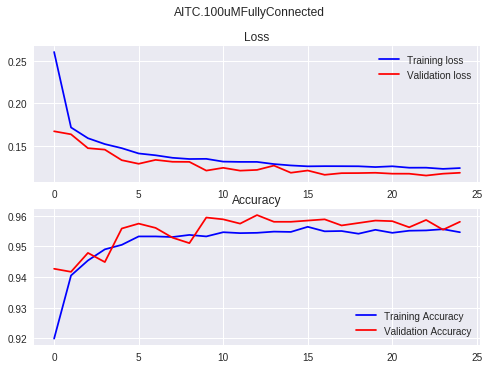

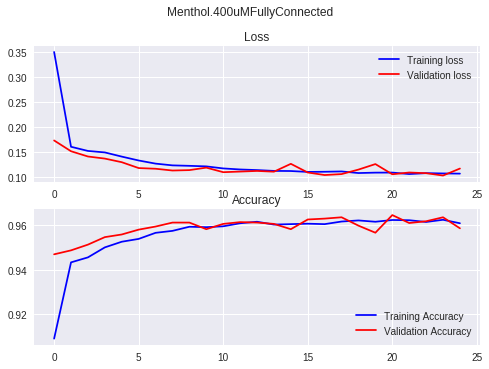

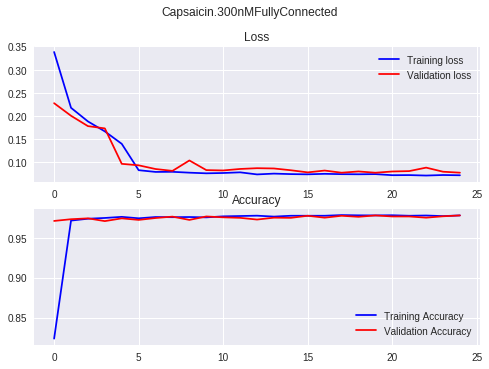

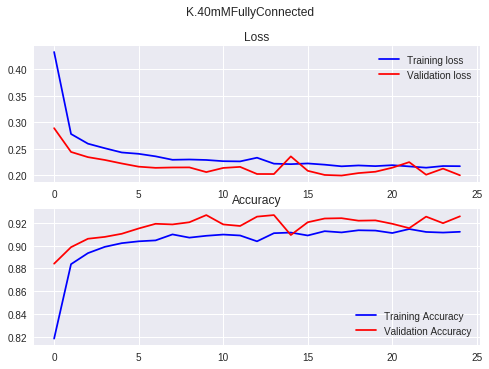

In [30]:
superDir = os.getcwd()
print(superDir)
os.chdir('/content/gdrive/My Drive/DL Project/data_in_csv')
main_dir  = os.getcwd()
expDirs  = next(os.walk('.'))[1]

for i in range(len(expDirs)):

  print("Entering " + expDirs[i] +" Directory \n\n")
  os.chdir(expDirs[i])
  traces = pd.read_csv("traces.csv", index_col=0)
  # some examples have na values get rid of
  traces = traces.dropna()
  tracesIndex = traces.index
    #Randomize!!
  # print(traces)
  # tracesIndex = tracesIndex[np.random.permutation(len(tracesIndex))]
  # traces = traces.loc[tracesIndex,]
  
  #This need to be a 3 dimensional numpy array
  traces = np.asarray(traces)
  #Add the new Dimension
  #traces = traces[...,np.newaxis]

  #Load the Labels
  labels = pd.read_csv("labels.csv", index_col=0)
  #Load lables that match the traces above
  labels = labels.loc[tracesIndex,]
  #Convert to Category
  labels = labels.iloc[:,0].astype('category')
  #convert to np array
  labels = np.asarray(labels)
  X_train, X_test, y_train, y_test = train_test_split(traces, labels, test_size=0.33)

  # val = int(np.ceil(traces.shape[0]*.33))
  # trainSize = traces.shape[0] - val 

  # x_train  = traces[:trainSize,...]
  # y_train = labels[:trainSize]

  # x_test = traces[trainSize:,...]
  # y_test = labels[trainSize:]

  BATCH_SIZE = 256
  # BUFFER_SIZE = 10000
  # train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
  # train = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

  # test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
  # test = test.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

  print(traces.shape[-2:])
  model=Sequential([
               Dense(60,input_shape=(traces.shape[1],)),
               Dense(5,activation='relu'),
               Dense(1,activation='sigmoid'),
   ])


  model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['acc'])

  model.summary()

  EVALUATION_INTERVAL = 500
  EPOCHS = 25

  # history = model.fit(train, epochs = EPOCHS, 
  #                     steps_per_epoch=EVALUATION_INTERVAL,
  #                     validation_data = test,
  #                      validation_steps=50)
  history = model.fit(X_train, y_train, epochs=25, 
                    validation_data=(X_test,y_test ))
  plot_train_history(history, expDirs[i]+"FullyConnected")     
    
    #Save the ModelYYYYYYYYYYY
  model.save(expDirs[i]+'exp1.h5')

    ##########################################################
    #Now that we have a model that works fairly well 
    #lets do some data analysis

    #These are Predicted Values
  labsPred = model.predict_classes(traces)
  labsPred = pd.DataFrame(labsPred) #convert to df

  #convert real to DataFrame
  labs = pd.DataFrame(labels)

  realTest = pd.concat([labs, labsPred], axis=1)

  realTest.columns = ['Real', "Predicted"]

  realTest = realTest.set_index(tracesIndex)

  realTest.to_csv('FullyConected.csv')

    #These are Predicted Values
  realVsPredCT = pd.crosstab(np.asarray(labsPred).flatten(), np.asarray(labs).flatten(), rownames=['pred'], colnames=['real'])
  
  print(realVsPredCT)

  del model
                    







  os.chdir(main_dir)